In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from data_utils import get_gfp_peaks
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

plt.style.use("papers")
plt.rcParams.update(
    {
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "savefig.facecolor": "white",
    }
)

FOLDER = "../results/20220526_random_data_stuff_200subjects_20channels_4states"

COLUMNS_ORDER = [
    "AAHC",
    "TAAHC",
    "mod. K-Means",
    "HMM",
    "PCA",
    "ICA",
]

In [5]:
data = pd.read_csv(
    os.path.join(FOLDER, "data_and_segmentation.csv"), index_col=[0, 1]
).rename(columns={"kmeans": "mod. K-Means"})
maps = xr.open_dataarray(os.path.join(FOLDER, "topomaps.nc"))

In [4]:
RND_SUBJECT = 8
subj_data = data.loc[(f"rnd_subject_{RND_SUBJECT}", slice(None))]
peaks, _ = get_gfp_peaks(
    subj_data.filter(like="chan").values.T,
    min_peak_dist=2,
    smoothing=None,
    smoothing_window=100,
)
subj_data["GFP"] = False
subj_data.iloc[peaks, -1] = True
subj_data

/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,chan_0,chan_1,chan_2,chan_3,chan_4,chan_5,chan_6,chan_7,chan_8,chan_9,...,chan_17,chan_18,chan_19,PCA,ICA,mod. K-Means,AAHC,TAAHC,HMM,GFP
time,,,,,,,,,,,,,,,,,,,,,
0.000,-8.085184,0.201489,4.004529,3.789088,-2.871174,4.156904,-7.865623,2.216833,-0.412013,-2.812848,...,0.851264,3.410073,6.159151,0,2,2,2,0,0,False
0.004,3.868673,-6.005208,0.866154,-2.356566,1.019161,1.668847,2.699349,4.668644,-4.124418,4.763765,...,8.783465,-7.889024,-1.975975,3,1,2,1,1,0,True
0.008,-0.658064,2.441131,-3.469935,2.516908,9.492576,-2.021460,-0.580138,-3.558024,0.645949,-6.096818,...,-4.637338,-1.869362,-3.569004,2,2,1,2,3,0,False
0.012,2.992298,-3.724680,-7.999052,9.359618,2.007484,-0.235393,-2.276951,-1.795185,-6.106020,0.117469,...,11.510195,2.754371,1.221119,1,1,2,2,3,0,False
0.016,-2.416146,-7.879828,-5.150623,2.101814,-7.440186,1.906087,-2.483526,-1.515951,7.983805,-3.816159,...,-8.473661,1.584788,-3.092418,0,0,0,3,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.980,-0.287452,-9.703297,3.614366,1.551553,13.963375,-0.525635,-0.014145,4.970717,0.315984,2.255942,...,-8.546465,0.539864,-4.706989,2,3,1,0,1,0,False
9.984,-1.808887,-5.553040,-5.096469,2.319992,-3.946595,-1.657413,5.993571,-3.637406,9.344398,3.735582,...,-6.417390,4.832790,-9.359245,0,0,0,3,1,0,True
9.988,-3.649332,1.823072,-0.073229,5.952583,-6.330443,3.912726,-3.958023,3.926089,4.030622,5.448725,...,0.177088,9.776579,-2.684892,3,2,3,2,3,0,False


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'AAHC'),
  Text(1, 0, 'TAAHC'),
  Text(2, 0, 'mod. K-Means'),
  Text(3, 0, 'HMM'),
  Text(4, 0, 'PCA'),
  Text(5, 0, 'ICA'),
  Text(6, 0, 'raw K-Means')])

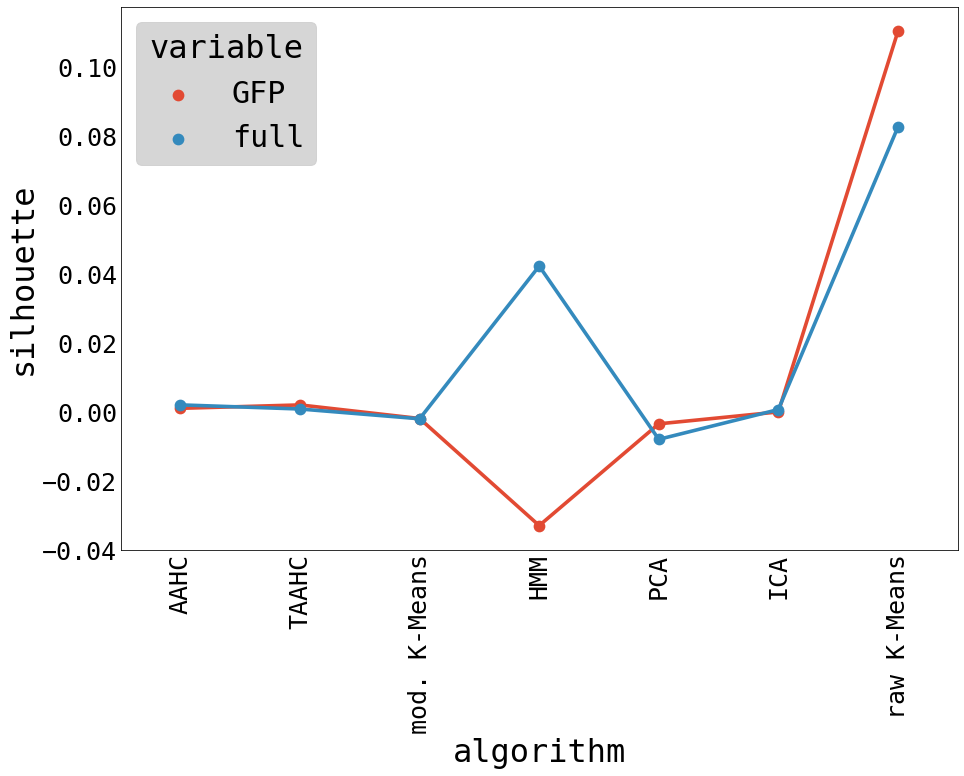

In [35]:
silhouette = pd.DataFrame(index=COLUMNS_ORDER, columns=["GFP", "full"])
silhouette.index.name = "algorithm"
for col in COLUMNS_ORDER:
    silhouette.loc[col, "GFP"] = silhouette_score(
        subj_data[subj_data["GFP"]].filter(like="chan"),
        subj_data[subj_data["GFP"]][col],
    )
    silhouette.loc[col, "full"] = silhouette_score(
        subj_data.filter(like="chan"), subj_data[col]
    )

# raw K-Means
raw = KMeans(n_clusters=4, n_init=100, max_iter=500)
raw_labels = raw.fit_predict(subj_data[subj_data["GFP"]].filter(like="chan"))
silhouette.loc["raw K-Means", "GFP"] = silhouette_score(
    subj_data[subj_data["GFP"]].filter(like="chan"),
    raw_labels,
)
raw = KMeans(n_clusters=4, n_init=100, max_iter=500)
raw_labels = raw.fit_predict(subj_data.filter(like="chan"))
silhouette.loc["raw K-Means", "full"] = silhouette_score(
    subj_data.filter(like="chan"),
    raw_labels,
)


silhouette.loc["raw K-Means", "GFP"]
plt.figure(figsize=(15, 10))
sns.pointplot(
    data=silhouette.reset_index().melt(id_vars="algorithm", value_name="silhouette"),
    x="algorithm",
    y="silhouette",
    hue="variable",
)
plt.xticks(rotation=90)